# Map25D_TM
---

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt

import os

<Axes: xlabel='z (m)', ylabel='x (m)'>

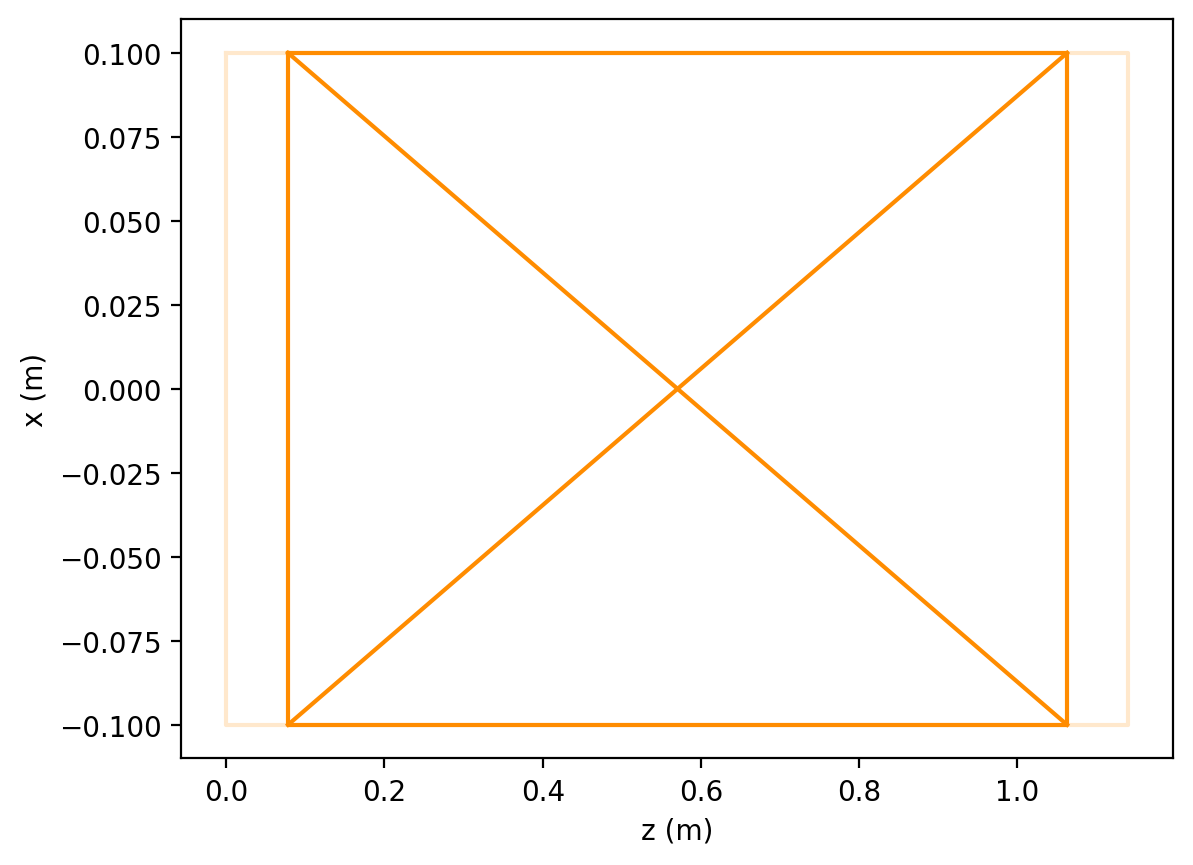

Type:            Map25D_TM
String form:    
Name: cav_7_cell
Type: Map25D_TM
s-entrance: 0 m.
s-exit: 1.14 m.
Length: 1.14
Width: 0.2 m.
File:            ~/GitHub/lume-gpt/gpt/maps.py
Docstring:       <no docstring>
Class docstring: Base class for all 2D cylindrically symmetric fields pointed along z 

In [2]:
from gpt.maps import Map25D_TM

cav = Map25D_TM('cav_7_cell', 'fields/7cell_2D.gdf', frequency=1.3e9, scale=1)
?cav
cav.plot_floor()

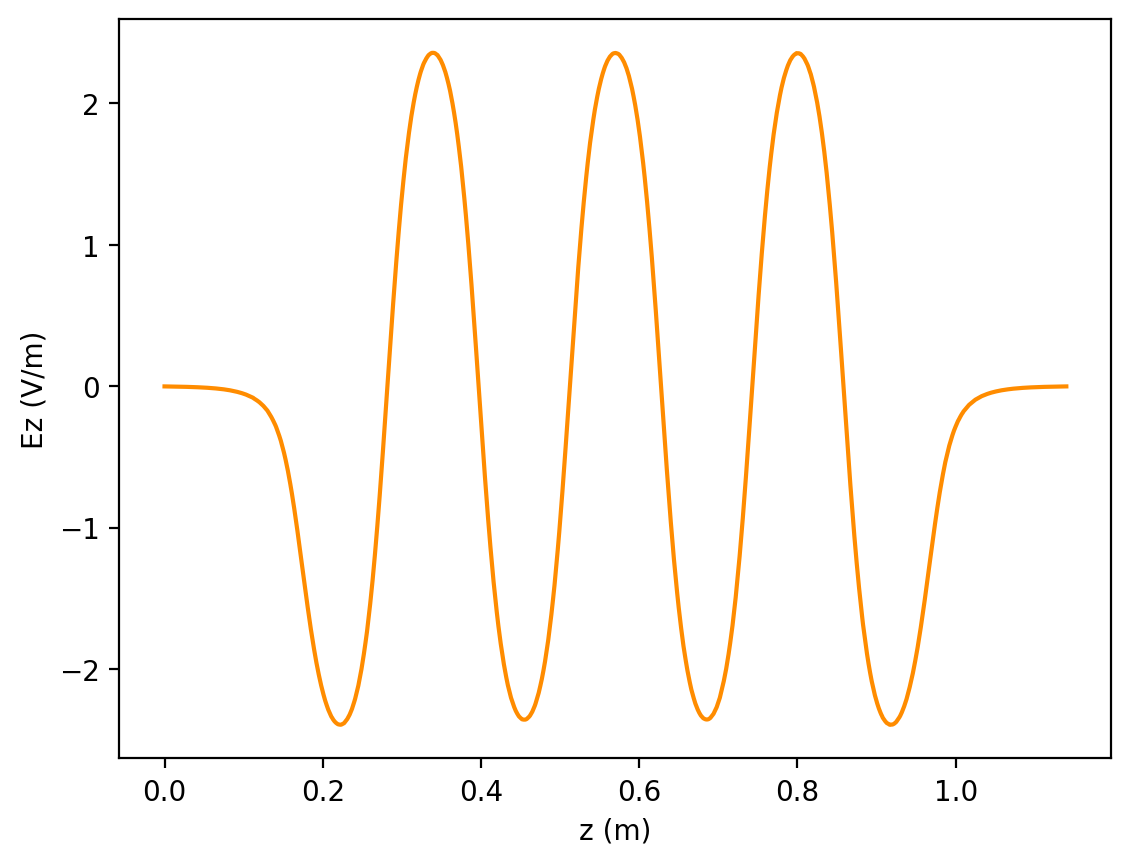

In [3]:
cav.plot_field_profile();

In [4]:
cav.gpt_lines()

['cav_7_cell_x = 0.0;',
 'cav_7_cell_y = 0.0;',
 'cav_7_cell_z = 0.57;',
 'cav_7_cell_yaw = 0;',
 'cav_7_cell_pitch = 0;',
 'cav_7_cell_roll = 0;',
 'cav_7_cell_scale = 1;',
 'cav_7_cell_oncrest_phase = 0;',
 'cav_7_cell_relative_phase = 0;',
 'cav_7_cell_phase = (cav_7_cell_oncrest_phase + cav_7_cell_relative_phase)*pi/180;',
 'cav_7_cell_k = 0;',
 'cav_7_cell_gamma = 1;',
 'cav_7_cell_frequency = 1300000000.0;',
 'Map25D_TM("wcs", "GxyzXYZ", cav_7_cell_x, cav_7_cell_y, cav_7_cell_z, cav_7_cell_yaw, cav_7_cell_pitch, cav_7_cell_roll, "/Users/colwyngulliford/GitHub/lume-gpt/examples/elements/fields/7cell_2D.gdf", "r", "z", "Er", "Ez", "Bphi", cav_7_cell_scale, cav_7_cell_k, cav_7_cell_phase, 2*pi*cav_7_cell_frequency);']

In [5]:
if os.path.exists('gpt.temp.in'):
    os.remove('gpt.temp.in')